EDIT OVERVIEW OF PROJECT

In [1]:
# Import packages needed for analysis of data
import pandas as pd
import plotly.express as px
import re
from matplotlib import pyplot as plt 
import numpy as np 
from scipy import stats 
import seaborn as sns

In [2]:
# Print info of DataFrame to get all attributes of table at once
DF = pd.read_csv("Life Expectancy Data.csv")
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
# It is good practice to ensure all columns follow the same name structure, so we need to ensure they are all string, lowercase, and without any white spaces.
DF.columns = DF.columns.str.strip().str.lower()

In [4]:
# Ensure that columns are all strings, lower cases, and have no white spaces.
print(DF.columns)

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')


In [5]:
# Now that leading and trailing spaces have been removed, can rename all columns
DF = DF.rename(
    columns={
        'life expectancy': 'life_expect',
        'adult mortality': 'adult_mortal',
        'infant deaths': 'infant_death',
        'percentage expenditure': 'percent_expend',
        'hepatitis_b': 'hep_b',
        'measles_': 'measles',
        '_bmi_': 'bmi',
        'under-five deaths': 'under_five_deaths',
        'total expenditure': 'total_expend',
        'diptheria ': 'diptheria',
        '_hiv/aids': 'hiv/aids',
        'thinness  1-19 years' : 'thinness_1-19_yrs',
        'thinness 5-9 years': 'thinness_5-9_yrs',
        'income composition of resources': 'income_comp_resources'

    }
)

In [6]:
print(DF.columns)

Index(['country', 'year', 'status', 'life_expect', 'adult_mortal',
       'infant_death', 'alcohol', 'percent_expend', 'hepatitis b', 'measles',
       'bmi', 'under_five_deaths', 'polio', 'total_expend', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1-19_yrs',
       'thinness_5-9_yrs', 'income_comp_resources', 'schooling'],
      dtype='object')


In [7]:
print(DF.isna().sum())
# Due to the enormous amount of data that is not missing from these columns, we will not drop any values as they is a significant amount of data provided, nor will we put 'N/A' or NaN as this may cause complications later when applying statistical analysis

country                    0
year                       0
status                     0
life_expect               10
adult_mortal              10
infant_death               0
alcohol                  194
percent_expend             0
hepatitis b              553
measles                    0
bmi                       34
under_five_deaths          0
polio                     19
total_expend             226
diphtheria                19
hiv/aids                   0
gdp                      448
population               652
thinness_1-19_yrs         34
thinness_5-9_yrs          34
income_comp_resources    167
schooling                163
dtype: int64


In [8]:
# Examine if there are duplicates
print(DF.duplicated().count())

2938


In [9]:
# These results make sense seeing as the time period is from 2000-2015 and look at each country as an individual entry for each particular year. We will not drop any of these duplicates as that is not necessary and would hinder an accurate assessment of data.

In [10]:
# Create dataframes for each year, analyze the data and then make an overall analysis considering all dataframes

In [11]:
# Create DF for the year 2000
DF_2000 = DF[DF['year'] == 2000]

# Print sample of DF_2000 to ensure DF_2000 was properly created
print(DF_2000.sample(10))

           country  year      status  life_expect  adult_mortal  infant_death  \
2264       Senegal  2000  Developing         57.5          25.0            27   
2296    Seychelles  2000  Developing         71.8         188.0             0   
1585        Malawi  2000  Developing         43.1         588.0            51   
1329         Japan  2000   Developed         81.1          74.0             4   
1393      Kiribati  2000  Developing         64.1         222.0             0   
2568    Tajikistan  2000  Developing         63.7         198.0            14   
31         Albania  2000  Developing         72.6          11.0             1   
2408  South Africa  2000  Developing         57.3         397.0            51   
1666    Mauritania  2000  Developing         60.0          23.0             7   
1698        Mexico  2000  Developing         74.8         129.0            55   

      alcohol  percent_expend  hepatitis b  measles  ...  polio  total_expend  \
2264     0.29        5.3973

In [12]:
# Get a little more information by using info() method on DF_2000
print(DF_2000.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 15 to 2937
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                183 non-null    object 
 1   year                   183 non-null    int64  
 2   status                 183 non-null    object 
 3   life_expect            183 non-null    float64
 4   adult_mortal           183 non-null    float64
 5   infant_death           183 non-null    int64  
 6   alcohol                182 non-null    float64
 7   percent_expend         183 non-null    float64
 8   hepatitis b            85 non-null     float64
 9   measles                183 non-null    int64  
 10  bmi                    181 non-null    float64
 11  under_five_deaths      183 non-null    int64  
 12  polio                  180 non-null    float64
 13  total_expend           179 non-null    float64
 14  diphtheria             180 non-null    float64
 15  hiv/aids 

In [13]:
# After creating the new DF_2000, the column names have reverted back to their originals. To keep consistency for all DFs created, we will rename them so as to be able to refer to one singular name for all.
DF_2000 = DF.rename(
    columns={
        'life expectancy': 'life_expect',
        'adult mortality': 'adult_mortal',
        'infant deaths': 'infant_death',
        'percentage expenditure': 'percent_expend',
        'hepatitis_b': 'hep_b',
        'measles_': 'measles',
        '_bmi_': 'bmi',
        'under-five deaths': 'under_five_deaths',
        'total expenditure': 'total_expend',
        'diptheria ': 'diptheria',
        '_hiv/aids': 'hiv/aids',
        'thinness  1-19 years' : 'thinness_1-19_yrs',
        'thinness 5-9 years': 'thinness_5-9_yrs',
        'income composition of resources': 'income_comp_resources'

    }
)

print(DF_2000.columns)

Index(['country', 'year', 'status', 'life_expect', 'adult_mortal',
       'infant_death', 'alcohol', 'percent_expend', 'hepatitis b', 'measles',
       'bmi', 'under_five_deaths', 'polio', 'total_expend', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1-19_yrs',
       'thinness_5-9_yrs', 'income_comp_resources', 'schooling'],
      dtype='object')


In [14]:
#There is still quite a lot of data entries for this specific DF, it would be easier to analyze data if separated into smaller categories. 
# Create a developed DF for DF_2000
DF_2000_developed = DF_2000[DF_2000['status'] == 'Developed']

#Ensure DF_2000_developed properly created
print(DF_2000_developed)

                       country  year     status  life_expect  adult_mortal  \
112                  Australia  2015  Developed         82.8          59.0   
113                  Australia  2014  Developed         82.7           6.0   
114                  Australia  2013  Developed         82.5          61.0   
115                  Australia  2012  Developed         82.3          61.0   
116                  Australia  2011  Developed         82.0          63.0   
...                        ...   ...        ...          ...           ...   
2805  United States of America  2004  Developed         77.5         111.0   
2806  United States of America  2003  Developed         77.2         114.0   
2807  United States of America  2002  Developed         77.0         115.0   
2808  United States of America  2001  Developed         76.9         115.0   
2809  United States of America  2000  Developed         76.8         114.0   

      infant_death  alcohol  percent_expend  hepatitis b  measl

In [15]:
#Create a DF for developing countries from the DF_2000 data
DF_2000_developing = DF_2000[DF_2000['status'] == 'Developing']

#Ensure DF_2000_developing was properly created
print(DF_2000_developing)

          country  year      status  life_expect  adult_mortal  infant_death  \
0     Afghanistan  2015  Developing         65.0         263.0            62   
1     Afghanistan  2014  Developing         59.9         271.0            64   
2     Afghanistan  2013  Developing         59.9         268.0            66   
3     Afghanistan  2012  Developing         59.5         272.0            69   
4     Afghanistan  2011  Developing         59.2         275.0            71   
...           ...   ...         ...          ...           ...           ...   
2933     Zimbabwe  2004  Developing         44.3         723.0            27   
2934     Zimbabwe  2003  Developing         44.5         715.0            26   
2935     Zimbabwe  2002  Developing         44.8          73.0            25   
2936     Zimbabwe  2001  Developing         45.3         686.0            25   
2937     Zimbabwe  2000  Developing         46.0         665.0            24   

      alcohol  percent_expend  hepatiti

In [16]:
# Look at how various predicting factors, already chosen, affect the life expectancy; then determine the most influential factors on the life expectancy for this chosen time period.
# Analyze Biological Factors first, these include: alcohol, hep_b, measles, polio, diptheria, hiv/aids, both categories for thinness, as well as bmi
# Assess these biological factors against the adult_mortal, infant_death, and life_expect columns, and determine if there is a positive or negative correlation. 


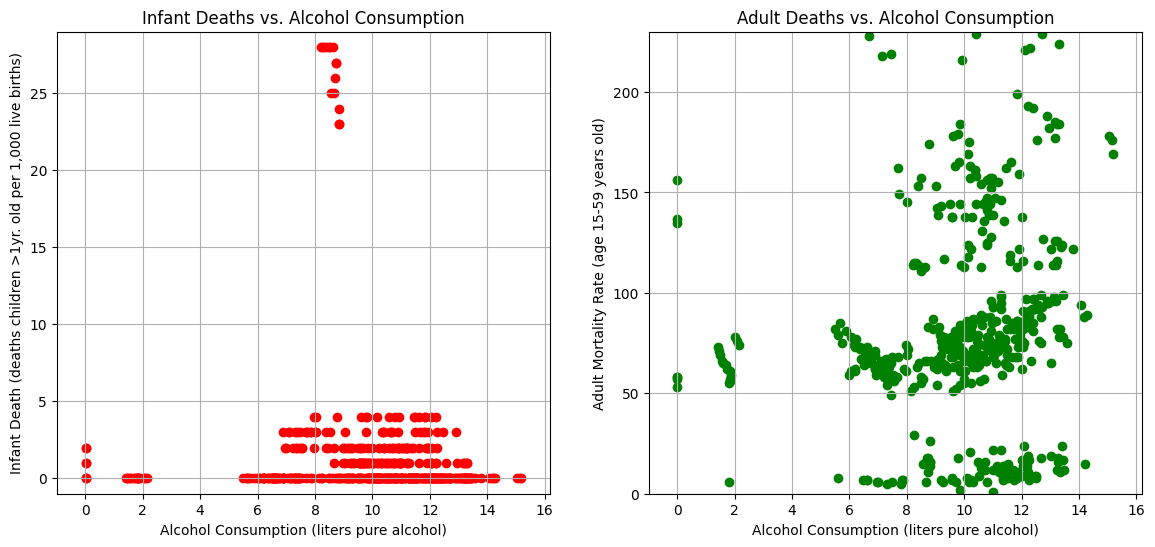

In [21]:
# How does consumption of alochol per capita (liters of pure alcohol) impact infant deaths, adult mortality, and the overall life expectancy for developed countries

# Create scatter plot for infant death in developed countries vs. alcohol consumption
plt.figure(figsize=(14,6))

# Scatter plot for infant_death vs alcohol
plt.subplot(1,2,1)
plt.scatter(DF_2000_developed['alcohol'], DF_2000_developed['infant_death'], color='red')
plt.title('Infant Deaths vs. Alcohol Consumption')
plt.xlabel('Alcohol Consumption (liters pure alcohol)')
plt.ylabel('Infant Death (deaths children >1yr. old per 1,000 live births)')
plt.xlim(DF_2000_developed['alcohol'].min() - 1, DF_2000_developed['alcohol'].max() + 1)
plt.ylim(DF_2000_developed['infant_death'].min() - 1, DF_2000_developed['infant_death'].max() + 1)
plt.grid(True)

# Scatter plot for adult_mortal vs alcohol
plt.subplot(1,2,2)
plt.scatter(DF_2000_developed['alcohol'], DF_2000_developed['adult_mortal'], color='green')
plt.title('Adult Deaths vs. Alcohol Consumption')
plt.xlabel('Alcohol Consumption (liters pure alcohol)')
plt.ylabel('Adult Mortality Rate (age 15-59 years old)')
plt.xlim(DF_2000_developed['alcohol'].min() - 1, DF_2000_developed['alcohol'].max() + 1)
plt.ylim(DF_2000_developed['adult_mortal'].min() - 1, DF_2000_developed['adult_mortal'].max() + 1)
plt.grid(True)

In [22]:
# Find the correlation coefficient between infant_death and alcohol
infant_death_alc_correlation = DF_2000_developed['infant_death'].corr(DF_2000_developed['alcohol'])
print(f"{infant_death_alc_correlation: .2f}")

-0.08


In [23]:
# Find the correlation between adult_mortal and alcohol
adult_mortal_alc_correlation = DF_2000_developed['adult_mortal'].corr(DF_2000_developed['alcohol'])
print(f"{adult_mortal_alc_correlation: .2f}")

 0.14
